In [1]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

2: Load the dataset



In [2]:

from google.colab import drive
drive.mount('/content/drive/')

data = pd.read_csv('/content/drive/MyDrive/DM/Classification/ObesityDataSet.csv')



Mounted at /content/drive/


In [3]:
# Step 3: Preprocessing the Data
# Encode categorical features
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [4]:
# Separate features (X) and target (y)
X = data.drop('NObeyesdad', axis=1)  # Drop the target column
y = data['NObeyesdad']  # Target variable

In [5]:
# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

In [7]:
# Step 5: Initialize and Train the Decision Tree Classifier
# Parameters are set for a similar behavior to the neural network's targets
dt_classifier = DecisionTreeClassifier(
    criterion='gini',  # Measure of split quality
    max_depth=10,      # Maximum depth of the tree
    random_state=42    # Ensures reproducibility
)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [8]:
# Step 6: Evaluate the Model
# Predictions
y_pred = dt_classifier.predict(X_test)

In [9]:
# Metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 91.02%


In [10]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoders['NObeyesdad'].classes_))


Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.98      0.87      0.92        54
      Normal_Weight       0.78      0.84      0.81        58
     Obesity_Type_I       0.93      0.90      0.91        70
    Obesity_Type_II       0.97      0.97      0.97        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.84      0.88      0.86        58
Overweight_Level_II       0.90      0.91      0.91        58

           accuracy                           0.91       423
          macro avg       0.91      0.91      0.91       423
       weighted avg       0.91      0.91      0.91       423



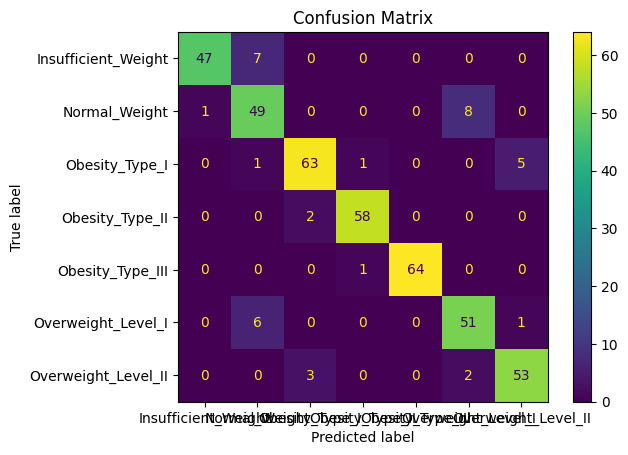

In [11]:

# Step 7: Visualize the Confusion Matrix
ConfusionMatrixDisplay.from_estimator(dt_classifier, X_test, y_test, display_labels=label_encoders['NObeyesdad'].classes_)
plt.title("Confusion Matrix")
plt.show()

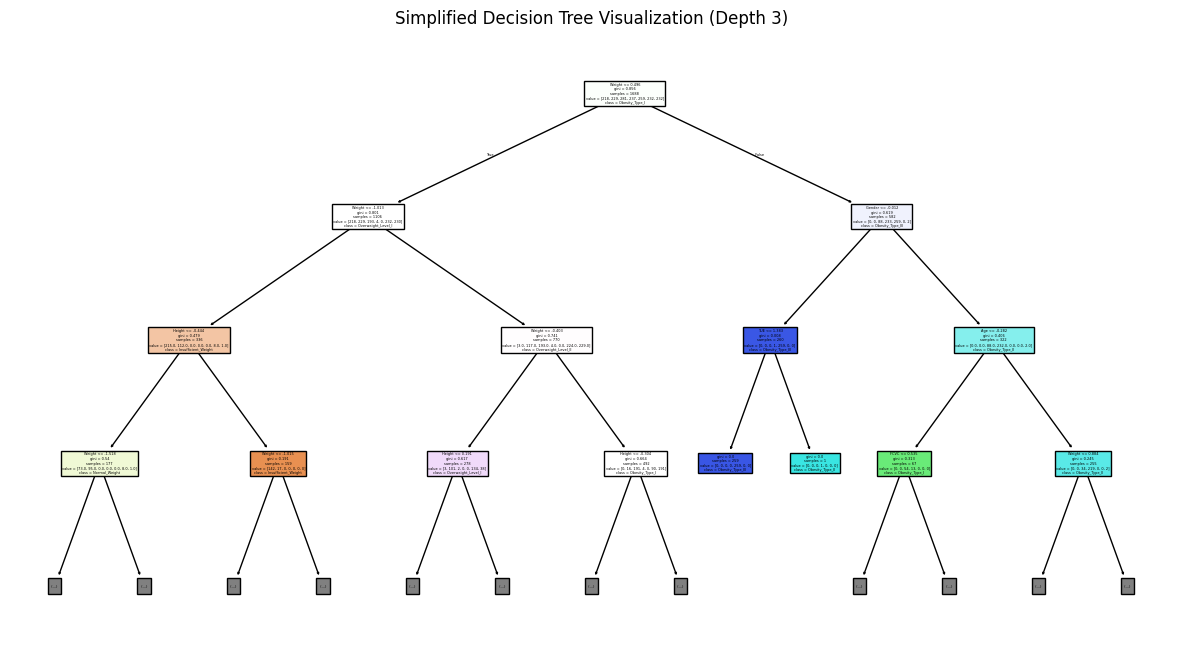

In [16]:
# Visualize the Decision Tree with a reduced depth for simplicity
from sklearn.tree import export_text, plot_tree

# Limit the depth of the tree for visualization purposes
plt.figure(figsize=(15, 8))
plot_tree(
    dt_classifier,
    feature_names=X.columns,
    class_names=label_encoders['NObeyesdad'].classes_,
    filled=True,
    max_depth=3  # Limit visualization to 3 levels for clarity
)
plt.title("Simplified Decision Tree Visualization (Depth 3)")
plt.show()

In [17]:
# Print the simplified tree in text format for better understanding
print("Simplified Decision Tree (Depth 3):")
print(export_text(dt_classifier, feature_names=list(X.columns), max_depth=3))


Simplified Decision Tree (Depth 3):
|--- Weight <= 0.50
|   |--- Weight <= -1.01
|   |   |--- Height <= -0.44
|   |   |   |--- Weight <= -1.52
|   |   |   |   |--- truncated branch of depth 6
|   |   |   |--- Weight >  -1.52
|   |   |   |   |--- truncated branch of depth 5
|   |   |--- Height >  -0.44
|   |   |   |--- Weight <= -1.02
|   |   |   |   |--- truncated branch of depth 7
|   |   |   |--- Weight >  -1.02
|   |   |   |   |--- truncated branch of depth 2
|   |--- Weight >  -1.01
|   |   |--- Weight <= -0.40
|   |   |   |--- Height <= 0.19
|   |   |   |   |--- truncated branch of depth 7
|   |   |   |--- Height >  0.19
|   |   |   |   |--- truncated branch of depth 7
|   |   |--- Weight >  -0.40
|   |   |   |--- Height <= -0.30
|   |   |   |   |--- truncated branch of depth 7
|   |   |   |--- Height >  -0.30
|   |   |   |   |--- truncated branch of depth 7
|--- Weight >  0.50
|   |--- Gender <= -0.01
|   |   |--- TUE <= 1.38
|   |   |   |--- class: 4
|   |   |--- TUE >  1.38
|  

In [18]:
# Feature Importance Visualization
import seaborn as sns

# Extract feature importance from the model
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_classifier.feature_importances_
}).sort_values(by='Importance', ascending=False)

<ipython-input-19-d1b39e17d0e4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')


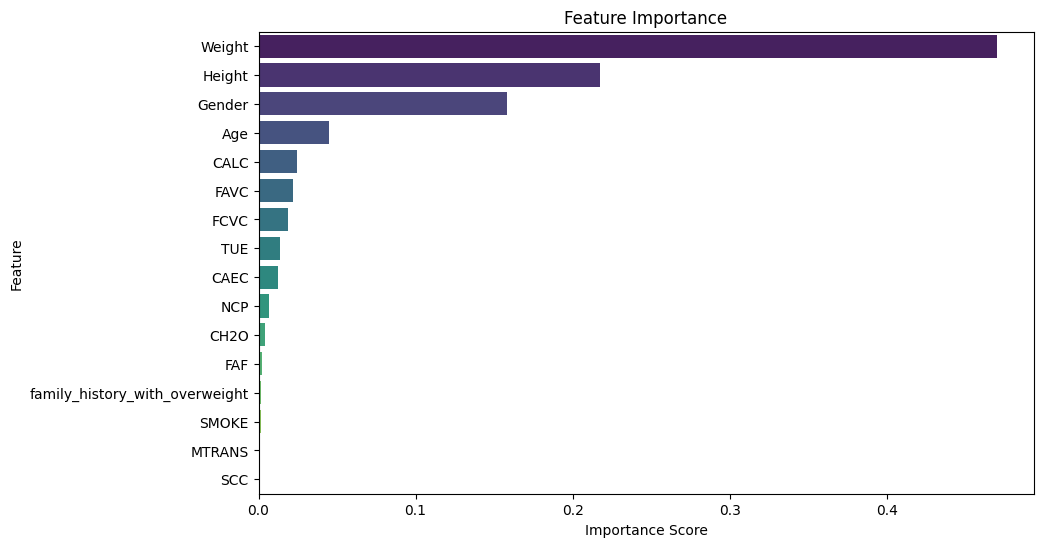

In [19]:

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

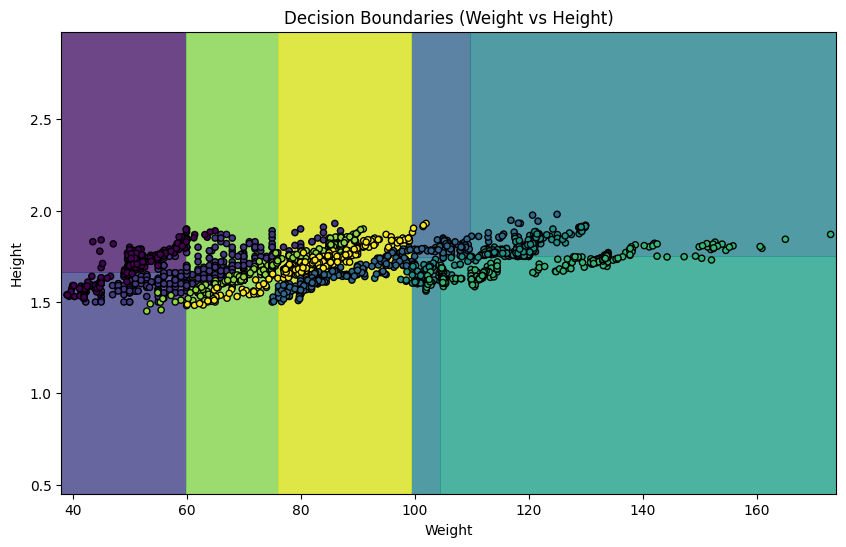

In [22]:
# Additional: Decision Boundaries Visualization (if dataset has 2 features)
# Select the top 2 most important features for a decision boundary plot
if feature_importance.shape[0] >= 2:
    top_features = feature_importance['Feature'].head(2).tolist()
    X_2d = X[top_features].values

    # Train a new model for 2D visualization
    dt_2d = DecisionTreeClassifier(max_depth=3, random_state=42)
    dt_2d.fit(X_2d, y)

    # Create meshgrid for the plot
    x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
    y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

     # Predict values for the meshgrid
    Z = dt_2d.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, edgecolor='k', s=20, cmap='viridis')
    plt.title(f"Decision Boundaries ({top_features[0]} vs {top_features[1]})")
    plt.xlabel(top_features[0])
    plt.ylabel(top_features[1])
    plt.show()